In [1]:
#Generate a dataset by sampling 1,600 values from a cubic function, with noise added to the sampled values
import numpy as np

numSamples = 1600
X = np.random.rand(numSamples, 1)
y = X ** 3
noise = np.random.randn(numSamples, 1)
y_withNoise = y + noise

In [10]:
#Create a 80/20 train/test split of the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_withNoise, test_size = 0.2, random_state = 10)
print("Number samples in training:", len(X_train))
print("Number samples in testing:", len(X_test))

Number samples in training: 1280
Number samples in testing: 320


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

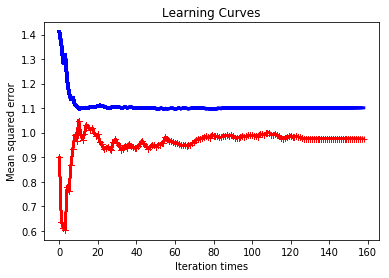

In [52]:
#Define the plot_learning_curves function
def plot_learning_curves(model, X_train, X_test, y_train, y_test):
    train_errors, test_errors = [], []
    for m in range(10, len(X), 10):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_test_predict = model.predict(X_test)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        test_errors.append(mean_squared_error(y_test_predict, y_test))
        plt.plot(train_errors, "r-+", linewidth = 2)
        plt.plot(test_errors, "b-", linewidth = 3)
        plt.ylabel('Mean squared error')
        plt.xlabel('Iteration times')
        plt.title('Learning Curves')

#Plot learning curves for linear model
linear_reg_model = linear_model.LinearRegression()
plot_learning_curves(linear_reg_model, X_train, X_test, y_train, y_test)

In [12]:
#Evaluate model performance on the test dataset using MSE
linear_reg_model.fit(X_train, y_train)
y_predicted = linear_reg_model.predict(X_test)
mean_squared_error(y_test, y_predicted)

1.1012647384801935

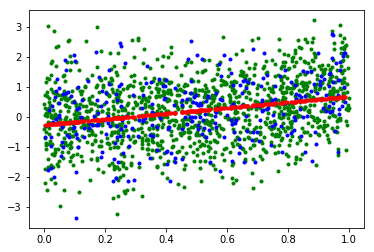

In [6]:
plt.plot(X_train, y_train, "g.")
plt.plot(X_test, y_test, "b.")
plt.plot(X_test, y_predicted, "r.")

In [7]:
#Polynomial regression
poly_features = PolynomialFeatures(degree = 5, include_bias = False)
X_poly = poly_features.fit_transform(X)
print(X.shape)
print(X_poly.shape)

(1600, 1)
(1600, 5)


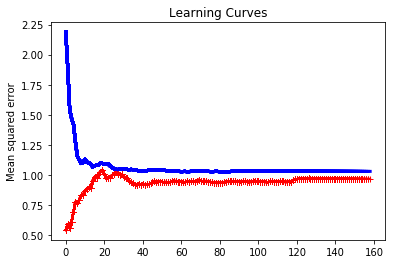

In [8]:
#Plot learning curves for polynomial regression
X_polyTrain, X_polyTest, y_polyTrain, y_polyTest = train_test_split(X_poly, y_withNoise, test_size = 0.2, random_state = 9)
poly_model = linear_model.LinearRegression()
plot_learning_curves(poly_model, X_polyTrain, X_polyTest, y_polyTrain, y_polyTest)

In [9]:
poly_model.fit(X_polyTrain, y_polyTrain)
y_polyPredicted = poly_model.predict(X_polyTest)
mean_squared_error(y_polyTest, y_polyPredicted)

1.0311688227718412

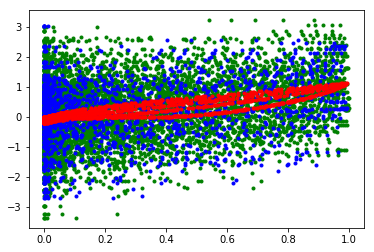

In [13]:
plt.plot(X_polyTrain, y_polyTrain, "g.")
plt.plot(X_polyTest, y_polyTest, "b.")
plt.plot(X_polyTest, y_polyPredicted, "r.")

In [70]:
#Load a real dataset from scikit learn
from sklearn.datasets import load_diabetes

diabetes_data = load_diabetes()
print(diabetes_data.DESCR)

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani

In [72]:
#Create a 80/20 train/test split of the dataset
X_d = diabetes_data.data
y_d = diabetes_data.target
X_d_train, X_d_test, y_d_train, y_d_test = train_test_split(X, y, test_size = 0.2, random_state = 7)
print("Number samples in training:", len(X_d_train))
print("Number samples in testing:", len(X_d_test))

Number samples in training: 1280
Number samples in testing: 320


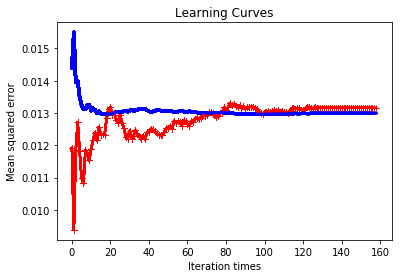

In [73]:
#Learning Curves for linear regression        
lr_model = linear_model.LinearRegression()
plot_learning_curves(lr_model, X_d_train, X_d_test, y_d_train, y_d_test)

In [74]:
#Calculate MSE for linear regression
lr_model.fit(X_d_train, y_d_train)
y_d_predicted_l1 = lr_model.predict(X_d_train)
y_d_predicted_l2 = lr_model.predict(X_d_test)
l1 = mean_squared_error(y_d_train, y_d_predicted_l1)
l2 = mean_squared_error(y_d_test, y_d_predicted_l2)
print(l1, l2)

0.01316720614059319 0.012997665600507751


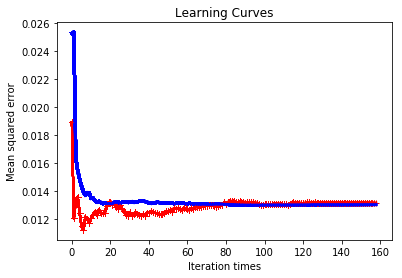

In [75]:
#Learning Curves for ridge regression
ridge_model = linear_model.Ridge(alpha = 0.5)
plot_learning_curves(ridge_model, X_d_train, X_d_test, y_d_train, y_d_test)

In [76]:
#Calculate MSE for ridge regression
ridge_model.fit(X_d_train, y_d_train)
y_d_predicted_r1 = ridge_model.predict(X_d_train)
y_d_predicted_r2 = ridge_model.predict(X_d_test)
r1 = mean_squared_error(y_d_train, y_d_predicted_r1)
r2 = mean_squared_error(y_d_test, y_d_predicted_r2)
print(r1, r2)

0.013168577822306706 0.013015503744462842


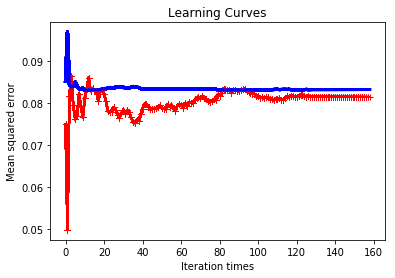

In [77]:
#Learning Curves for lasso regression
lasso_model = linear_model.Lasso(alpha=0.5)
plot_learning_curves(lasso_model, X_d_train, X_d_test, y_d_train, y_d_test)

In [78]:
#Calculate MSE for lasso regression
lasso_model.fit(X_d_train, y_d_train)
y_d_predicted_la1 = lasso_model.predict(X_d_train)
y_d_predicted_la2 = lasso_model.predict(X_d_test)
la1 = mean_squared_error(y_d_train, y_d_predicted_la1)
la2 = mean_squared_error(y_d_test, y_d_predicted_la2)
print(la1, la2)

0.08143571835002926 0.08317165021719329


In [79]:
#Learning Curves for Polynomial
poly_features_d = PolynomialFeatures(degree=4, include_bias = False)
X_d_poly = poly_features.fit_transform(X_d)
print(X_d.shape)
print(X_d_poly.shape)
X_d_polyTrain, X_d_polyTest, y_d_polyTrain, y_d_polyTest = train_test_split(X_d_poly, y_d, random_state = 0)

(442, 10)
(442, 3002)


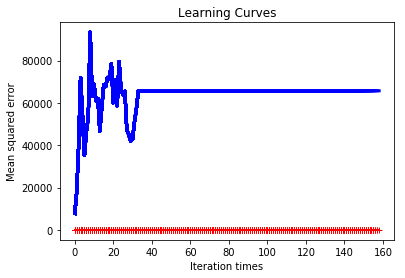

In [80]:
poly_d_model = linear_model.LinearRegression()
plot_learning_curves(poly_d_model, X_d_polyTrain, X_d_polyTest, y_d_polyTrain, y_d_polyTest)

In [81]:
#Calculate MSE for polynomial regression
poly_d_model.fit(X_d_polyTrain, y_d_polyTrain)
y_d_predicted_p1 = poly_d_model.predict(X_d_polyTrain)
y_d_predicted_p2 = poly_d_model.predict(X_d_polyTest)
p1 = mean_squared_error(y_d_polyTrain, y_d_predicted_p1)
p2 = mean_squared_error(y_d_polyTest, y_d_predicted_p2)
print(p1, p2)

2.0587922688456543e-22 65759.900851364


In [82]:
#Report values in a table
import pandas as pd
df=pd.DataFrame({'MSE':["Training Error", "Testing Error"],'Linear':[l1,l2],'Ridge':[r1, r2], 'Lasso':[la1, la2], 'Polynomial':[p1, p2]})  
df

,MSE,Linear,Ridge,Lasso,Polynomial
0,Training Error,0.013167,0.013169,0.081436,2.058792e-22
1,Testing Error,0.012998,0.013016,0.083172,6.575990e+04


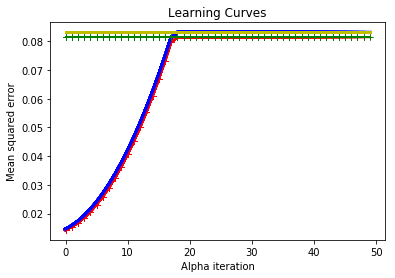

In [99]:
#Tuning Hyperparameters for Regularized Models
#Lasso
alpha = np.linspace(0.01, 0.2, 50)
train_errors, test_errors = [], []
for i in alpha:
    la_model = linear_model.Lasso(alpha=i)
    la_model.fit(X_d_train, y_d_train)
    y_train_predict = la_model.predict(X_d_train)
    y_test_predict = la_model.predict(X_d_test)
    train_errors.append(mean_squared_error(y_train_predict, y_d_train))
    test_errors.append(mean_squared_error(y_test_predict, y_d_test))
    plt.plot(train_errors, "r-+", linewidth = 2)
    plt.plot(test_errors, "b-", linewidth = 3)
    plt.ylabel('Mean squared error')
    plt.xlabel('Alpha iteration')
    plt.title('Learning Curves')
    if i == 0.01:
        plt.legend(['Lasso Training',"Lasso Testing", 'Ridge Training',"Ridge Testing"])

alpha1 = np.linspace(0, 20, 50)
train_errors_r, test_errors_r = [], []
for j in alpha1:
    rg_model = linear_model.Ridge(alpha=i)
    rg_model.fit(X_d_train, y_d_train)
    y_train_predict = la_model.predict(X_d_train)
    y_test_predict = la_model.predict(X_d_test)
    train_errors_r.append(mean_squared_error(y_train_predict, y_d_train))
    test_errors_r.append(mean_squared_error(y_test_predict, y_d_test))
    plt.plot(train_errors_r, "g-+", linewidth = 2)
    plt.plot(test_errors_r, "y-", linewidth = 3)
    plt.ylabel('Mean squared error')
    plt.xlabel('Alpha iteration')
    plt.title('Learning Curves')
    if i == 0:
        plt.legend(['Lasso Training',"Lasso Testing", 'Ridge Training',"Ridge Testing"])

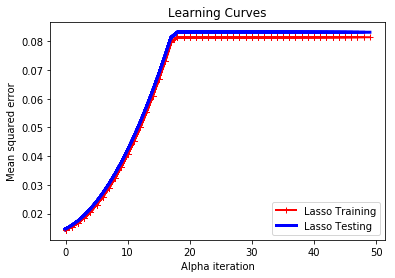

In [100]:
#Tuning Hyperparameters for Regularized Models
#Lasso
alpha = np.linspace(0.01, 0.2, 50)
train_errors, test_errors = [], []
for i in alpha:
    la_model = linear_model.Lasso(alpha=i)
    la_model.fit(X_d_train, y_d_train)
    y_train_predict = la_model.predict(X_d_train)
    y_test_predict = la_model.predict(X_d_test)
    train_errors.append(mean_squared_error(y_train_predict, y_d_train))
    test_errors.append(mean_squared_error(y_test_predict, y_d_test))
    plt.plot(train_errors, "r-+", linewidth = 2)
    plt.plot(test_errors, "b-", linewidth = 3)
    plt.ylabel('Mean squared error')
    plt.xlabel('Alpha iteration')
    plt.title('Learning Curves')
    if i == 0.01:
        plt.legend(['Lasso Training',"Lasso Testing")

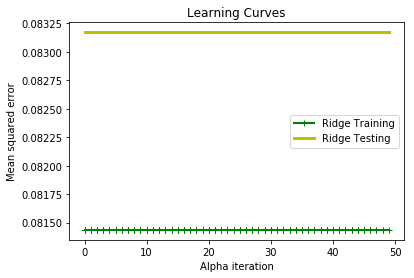

In [95]:
#Tuning Hyperparameters for Regularized Models
#Ridge
alpha1 = np.linspace(0, 20, 50)
train_errors_r, test_errors_r = [], []
for i in alpha1:
    rg_model = linear_model.Ridge(alpha=i)
    rg_model.fit(X_d_train, y_d_train)
    y_train_predict = la_model.predict(X_d_train)
    y_test_predict = la_model.predict(X_d_test)
    train_errors_r.append(mean_squared_error(y_train_predict, y_d_train))
    test_errors_r.append(mean_squared_error(y_test_predict, y_d_test))
    plt.plot(train_errors_r, "g-+", linewidth = 2)
    plt.plot(test_errors_r, "y-", linewidth = 3)
    plt.ylabel('Mean squared error')
    plt.xlabel('Alpha iteration')
    plt.title('Learning Curves')
    if i == 0:
        plt.legend(['Ridge Training',"Ridge Testing"])